In [1]:
import os
from sagas.conf import resource_path
from sagas.conf.conf import cf
from pyltp import Segmentor

MODELDIR = f'{cf.conf_dir}/ai/ltp/ltp_data_v3.4.0'

from pyltp import Postagger
postagger = Postagger()  # 初始化实例
postagger.load(os.path.join(MODELDIR, "pos.model"))  # 加载模型

In [2]:
words = ['列出', '所有','的', '采购订单']  # 分词结果
postags = postagger.postag(words)  # 词性标注
print('\t'.join(postags))

v	b	u	n


In [6]:
from sagas.conf import resource_path
import jieba

dictf = resource_path('dict_zh.txt')
jieba.load_userdict(dictf) 
seg_list = jieba.cut("列出所有的采购订单")  # 默认是精确模式
words=list(seg_list)
print("\t".join(words))
postags = postagger.postag(words)  # 词性标注
print('\t'.join(postags))

列出	所有	的	采购订单
v	b	u	n


In [11]:
par_model_path = os.path.join(MODELDIR, 'parser.model')  # 依存句法分析模型路径，模型名称为`parser.model`

from pyltp import Parser
parser = Parser() # 初始化实例
parser.load(par_model_path)  # 加载模型

In [12]:
arcs = parser.parse(words, postags)  # 句法分析
print("\t".join("%d:%s" % (arc.head, arc.relation) for arc in arcs))

0:HED	4:ATT	2:RAD	1:VOB


想要 --> 我|SBV|r|O
想要 --> 新建|VOB|v|O
寄账单地址 --> 一些|ATT|m|O
新建 --> 寄账单地址|VOB|n|O


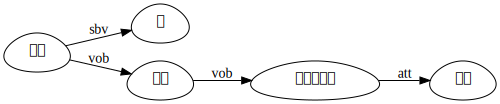

In [2]:
from sagas.nlu.analz import Analz
z=Analz()
z.add_pats('typ', ['寄账单地址'])
z.add_pats('srv', ['新建'])
doc=z.parse("我想要新建一些寄账单地址")
z.vis(doc)

In [3]:
doc.terms

[{'term': 'srv', 'value': '新建'}, {'term': 'typ', 'value': '寄账单地址'}]

In [10]:
for i in range(len(doc.words)):
    idx=int(doc.arcs[i].head) - 1
    a = doc.words[idx]
    print("%d %s --> %s|%s|%s|%s %d" % (i, a, doc.words[i], 
                                  doc.arcs[i].relation, 
                                  doc.postags[i], doc.netags[i], idx))

0 想要 --> 我|SBV|r|O 1
1 寄账单地址 --> 想要|HED|v|O -1
2 想要 --> 新建|VOB|v|O 1
3 寄账单地址 --> 一些|ATT|m|O 4
4 新建 --> 寄账单地址|VOB|n|O 2
